In [1]:
# Download the training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2022-04-28 07:47:40--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.124.128, 172.217.214.128, 108.177.111.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.124.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   129MB/s    in 1.1s    

2022-04-28 07:47:41 (129 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [2]:
# Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2022-04-28 07:47:41--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.6.128, 142.250.159.128, 74.125.132.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.6.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  --.-KB/s    in 0.1s    

2022-04-28 07:47:42 (75.9 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



In [3]:
import os
import zipfile

# Extract the archive
zip_ref = zipfile.ZipFile('./horse-or-human.zip', 'r')
zip_ref.extractall('tmp/horse-or-human')

zip_ref = zipfile.ZipFile('./validation-horse-or-human.zip', 'r')
zip_ref.extractall('tmp/validation-horse-or-human')

zip_ref.close()

# Directory with training horse pictures
train_horse_dir = os.path.join('tmp/horse-or-human/horses')

# Directory with training human pictures
train_human_dir = os.path.join('tmp/horse-or-human/humans')

# Directory with training horse pictures
validation_horse_dir = os.path.join('tmp/validation-horse-or-human/horses')

# Directory with training human pictures
validation_human_dir = os.path.join('tmp/validation-horse-or-human/humans')

In [4]:
import tensorflow as tf

def get_model():
  # Build the model
  model = tf.keras.models.Sequential([
      # Note the input shape is the desired size of the image 300x300 with 3 bytes color
      # This is the first convolution
      tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      # The second convolution
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      # The third convolution
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      # The fourth convolution
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      # The fifth convolution
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      # Flatten the results to feed into a DNN
      tf.keras.layers.Flatten(),
      # 512 neuron hidden layer
      tf.keras.layers.Dense(512, activation='relu'),
      # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.summary()

  from tensorflow.keras.optimizers import RMSprop

  # Set training parameters
  model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=1e-4),
                metrics=['accuracy'])
  return model


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Apply data augmentation
train_datagen_aug = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        'tmp/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 149, 149, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 73, 73, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 35, 35, 64)      

In [10]:
# Constant for epochs
EPOCHS = 20
model = get_model()
# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=EPOCHS,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/20
8/8 [==============================] - 96s 12s/step - loss: 0.6820 - accuracy: 0.5439 - val_loss: 0.6338 - val_accuracy: 0.7344
Epoch 2/20
8/8 [==============================] - 84s 10s/step - loss: 0.6416 - accuracy: 0.7564 - val_loss: 0.7097 - val_accuracy: 0.5078
Epoch 3/20
8/8 [==============================] - 84s 10s/step - loss: 0.5208 - accuracy: 0.8065 - val_loss: 0.6609 - val_accuracy: 0.5820
Epoch 4/20
8/8 [==============================] - 84s 10s/step - loss: 0.4317 - accuracy: 0.8587 - val_loss: 0.3408 - val_accuracy: 0.8672
Epoch 5/20
8/8 [==============================] - 88s 12s/step - loss: 0.3263 - accuracy: 0.9043 - val_loss: 0.3848 - val_accuracy: 0.8477
Epoch 6/20
8/8 [==============================] - 100s 13s/step - loss: 0.2564 - accuracy: 0.9277 - val_loss: 0.3341 - val_accuracy: 0.8828
Epoch 7/20
8/8 [==============================] - 89s 11s/step - loss: 0.2105 - accuracy: 0.9366 - val_loss: 0.4107 - val_accuracy: 0.8594
Epoch 8/20
8/8 [==========

In [7]:
# Constant for epochs
EPOCHS = 20
model_no_aug = get_model()
# Train the model with no augmentation
history_no_aug = model_no_aug.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=EPOCHS,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/20
8/8 [==============================] - 83s 10s/step - loss: 0.6752 - accuracy: 0.5884 - val_loss: 0.7288 - val_accuracy: 0.5000
Epoch 2/20
8/8 [==============================] - 88s 11s/step - loss: 0.6194 - accuracy: 0.6986 - val_loss: 0.5201 - val_accuracy: 0.8867
Epoch 3/20
8/8 [==============================] - 83s 10s/step - loss: 0.5431 - accuracy: 0.8087 - val_loss: 0.4198 - val_accuracy: 0.8516
Epoch 4/20
8/8 [==============================] - 83s 10s/step - loss: 0.4771 - accuracy: 0.8242 - val_loss: 0.4049 - val_accuracy: 0.8359
Epoch 5/20
8/8 [==============================] - 83s 10s/step - loss: 0.3311 - accuracy: 0.9410 - val_loss: 0.3778 - val_accuracy: 0.8633
Epoch 6/20
8/8 [==============================] - 92s 12s/step - loss: 0.2835 - accuracy: 0.9014 - val_loss: 0.5289 - val_accuracy: 0.8320
Epoch 7/20
8/8 [==============================] - 85s 10s/step - loss: 0.2746 - accuracy: 0.8999 - val_loss: 0.8065 - val_accuracy: 0.7773
Epoch 8/20
8/8 [===========

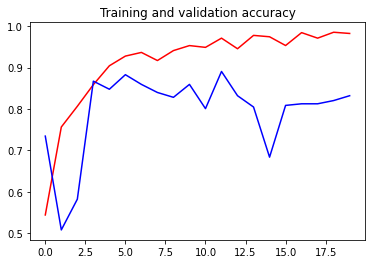

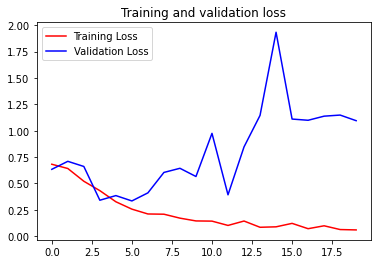

In [12]:
import matplotlib.pyplot as plt

# Plot the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

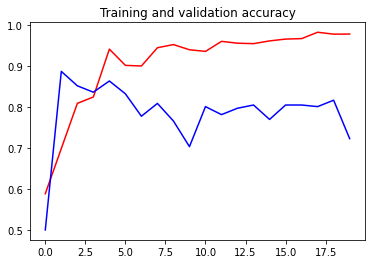

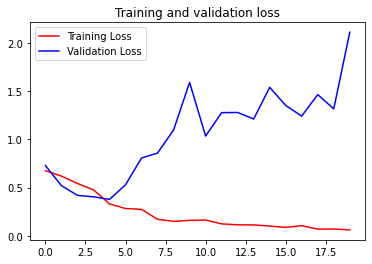

In [9]:
import matplotlib.pyplot as plt

# Plot the model results
acc = history_no_aug.history['accuracy']
val_acc = history_no_aug.history['val_accuracy']
loss = history_no_aug.history['loss']
val_loss = history_no_aug.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()